# 9. alkalom: Gyorsulás adatok feldolgozása

Ez a notebook egy lift mozgása során a telefon gyorsulásmérőjével gyűjtött adatok 
- beolvasását, 
- ábrázolásást, 
- majd a pillanatnyi sebesség és helyzet kiszámítását tartalmazza

### Hogyan mozog, hely, sebesség és gyorsulás kapcsolata egyenes mentén

**Hely adatok:** 
 - Minden időpontban tudom a helykoordinátát: $x(t)$ függvény
 - Sok időpontban tudom a helykoordinátát (MÉRÉS): $x_i = x(t_i)$ adatok

**Hely adatokból sebesség:** 
 - Pillanatnyi sebesség $v(t)=\dfrac{\Delta x}{\Delta t}=\dfrac{x(t)-x(t-\Delta t)}{\Delta t}$, ahol $\Delta t$ nagyon rövid.
 - Adatokkal $v_i=\dfrac{x_i-x_{i-1}}{\Delta t}$, ahol $\Delta t$ kellően rövid

**Sebesség adatokból gyorsulás:** 
 - Pillanatnyi gyorsulás $a(t)=\dfrac{\Delta v}{\Delta t}=\dfrac{v(t)-v(t-\Delta t)}{\Delta t}$, ahol $\Delta t$ nagyon rövid.
 - Adatokkal $a_i=\dfrac{v_i-v_{i-1}}{\Delta t}$, ahol $\Delta t$ kellően rövid

**Gyorsulás adatokból sebesség:** Az előző összefüggést átrendezve 
 - Adatokkal $v_i= v_{i-1}+a_i\cdot \Delta t=v_{i-1}+a_i\cdot (t_i-t_{i-1})$

**Sebesség adatokból hely adat:**  teljesen hasonló számítással
 - Adatokkal $x_i= x_{i-1}+v_i\cdot \Delta t=x_{i-1}+v_i\cdot (t_i-t_{i-1})$

### A szükséges csomagok importálása

In [56]:
import pandas as pd        # Pandas csomag - adatkezelés 
import numpy as np         # Numpy  csomag - numerikus számítások
import matplotlib.pyplot as plt    # MatPlotLib - ábrázolás
%matplotlib inline    

### Fájl beolvasása 
Előtte győződjünk meg róla, hogy az aktuálisan használt könyvtárunkba már bemásoltuk a fájlt
 - A fájl letölthető innen: [Lift_gyorsulas_adatok_nyers.xlsx](https://raw.githubusercontent.com/zoldbirka/colab-test-pub/master/_files/Lift_gyorsulas_adatok_nyers.xlsx)

- pandas csomag ```read_excel()``` eljárása 

In [ ]:
## Innen le is tölthetünk egyet (Colabban / Linuxos gépen működik)
!wget https://raw.githubusercontent.com/zoldbirka/colab-test-pub/master/_files/Lift_gyorsulas_adatok_nyers.xlsx

In [57]:
input_file="Lift_gyorsulas_adatok_nyers.xlsx" 

adata = pd.read_excel(input_file)

In [58]:
adata

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.015842,0.099,-0.024,9.797,9.797530
1,0.020933,-0.015,0.052,9.969,9.969147
2,0.026023,0.118,0.052,9.912,9.912838
3,0.031113,0.060,0.032,9.988,9.988231
4,0.036203,0.099,0.109,9.912,9.913093
...,...,...,...,...,...
3298,16.800199,0.079,0.090,10.084,10.084711
3299,16.805289,0.079,0.052,9.816,9.816456
3300,16.810379,0.022,0.071,9.816,9.816281
3301,16.815469,0.099,0.013,9.893,9.893504


#### A beolvasott adatok DataFrame-je
- ```.head()``` és ```.tail()``` segít az adatok egy részét megjeleníteni
- síma ```[ : ]``` is működik most, de jobb az ```.iloc[ : ]```

In [59]:
adata.iloc[0:10]

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.015842,0.099,-0.024,9.797,9.797530
1,0.020933,-0.015,0.052,9.969,9.969147
2,0.026023,0.118,0.052,9.912,9.912838
3,0.031113,0.060,0.032,9.988,9.988231
4,0.036203,0.099,0.109,9.912,9.913093
5,0.041294,0.003,0.071,9.893,9.893255
6,0.046384,0.099,0.128,9.873,9.874326
7,0.051475,0.118,0.128,10.008,10.009514
8,0.056565,0.099,-0.024,9.835,9.835528
9,0.061654,0.003,0.109,9.873,9.873602


#### A beolvasott adatok néhány jellemzője:
- ```.shape``` --  méretek
- ```.columns``` -- oszlop nevek
- ```.dtypes``` -- oszlopok adatípusai
- ```.describe()```  -- statisztikai jellemzők

In [60]:
# méretek
len(adata), adata.shape

(3303, (3303, 5))

In [61]:
# összefoglaló
adata.describe()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
count,3303.000000,3303.000000,3303.000000,3303.000000,3303.000000
mean,8.418001,0.076068,0.078240,9.896643,9.897527
std,4.853175,0.047409,0.057631,0.251682,0.251619
min,0.015842,-0.150000,-0.196000,7.843000,7.848925
25%,4.217066,0.041000,0.032000,9.835000,9.835584
50%,8.417952,0.079000,0.071000,9.893000,9.894010
75%,12.618917,0.099000,0.109000,9.969000,9.969316
max,16.820558,0.252000,0.473000,10.601000,10.601933


In [62]:
# oszlopnevek
adata.columns

Index(['Time (s)', 'Acceleration x (m/s^2)', 'Acceleration y (m/s^2)',
       'Acceleration z (m/s^2)', 'Absolute acceleration (m/s^2)'],
      dtype='object')

In [63]:
  # adatípusok  
adata.dtypes   

Time (s)                         float64
Acceleration x (m/s^2)           float64
Acceleration y (m/s^2)           float64
Acceleration z (m/s^2)           float64
Absolute acceleration (m/s^2)    float64
dtype: object

#### Nevezzük át az oszlopkat használhatóbb (rövidebb, nem szóközös) nevekre
szótárral érdemes magadni a kapcsolatot az új és a régi oszlop nevek közt
 - ```.rename(columns = ...)```
 - ```inplace = True``` kulcs paraméter igazra állítva ezzel át is írja az adatokat

In [64]:
# új oszlopnevek listája
uj_oszlop = ["t", "ax", "ay", "az", "aabs"]

In [65]:
# érdemes a zippelést használni a szótár előállításáshoz:
atnevez = dict(zip(adata.columns, uj_oszlop))
atnevez

{'Time (s)': 't',
 'Acceleration x (m/s^2)': 'ax',
 'Acceleration y (m/s^2)': 'ay',
 'Acceleration z (m/s^2)': 'az',
 'Absolute acceleration (m/s^2)': 'aabs'}

In [66]:
# átnevezés
adata.rename(columns = atnevez, inplace = True)

In [67]:
adata

,t,ax,ay,az,aabs
0,0.015842,0.099,-0.024,9.797,9.797530
1,0.020933,-0.015,0.052,9.969,9.969147
2,0.026023,0.118,0.052,9.912,9.912838
3,0.031113,0.060,0.032,9.988,9.988231
4,0.036203,0.099,0.109,9.912,9.913093
...,...,...,...,...,...
3298,16.800199,0.079,0.090,10.084,10.084711
3299,16.805289,0.079,0.052,9.816,9.816456
3300,16.810379,0.022,0.071,9.816,9.816281
3301,16.815469,0.099,0.013,9.893,9.893504


#### Hívatkozás egy-egy oszlopra
- ```adata["cimke"]```
- ```adata.cimke```   -- ha nincs benne szóköz furcsa karakter...

In [68]:
adata["aabs"]

0        9.797530
1        9.969147
2        9.912838
3        9.988231
4        9.913093
          ...    
3298    10.084711
3299     9.816456
3300     9.816281
3301     9.893504
3302    10.008363
Name: aabs, Length: 3303, dtype: float64

In [69]:
adata.columns

Index(['t', 'ax', 'ay', 'az', 'aabs'], dtype='object')

In [70]:
adata[["t", "az"]].head(2)

,t,az
0,0.015842,9.797
1,0.020933,9.969


In [71]:
adata.az

0        9.797
1        9.969
2        9.912
3        9.988
4        9.912
         ...  
3298    10.084
3299     9.816
3300     9.816
3301     9.893
3302    10.008
Name: az, Length: 3303, dtype: float64

In [72]:
# számolás oszlopokkal 
np.sqrt(adata.ax**2 + adata.ay**2 + adata.az**2)- adata.aabs < 10**(-6)

0       True
1       True
2       True
3       True
4       True
        ... 
3298    True
3299    True
3300    True
3301    True
3302    True
Length: 3303, dtype: bool

#### Ábrázoljuk a z irányú gyorsulás adatokat
 - ```plt.plot()```   -- matplotlib ábrázolás
 - ```plt.xlabel()``` --  tengely nevek
 - ```plt.title()```  -- grafikon cím

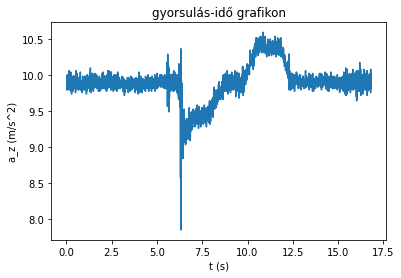

In [73]:
plt.plot(adata.t, adata["az"])
plt.title("gyorsulás-idő grafikon")
plt.xlabel("t (s)")
plt.ylabel("a_z (m/s^2)")
plt.show()

### Az adatok feldolgozása

#### fölösleges oszlopok törlése
- ```del``` vagy 
- ```.drop(columns=  )``` használata

In [74]:
# fölösleges oszlopok törlése
del adata["ax"]

In [75]:
adata.drop(columns=["ay","aabs"],inplace = True)

In [76]:
adata

,t,az
0,0.015842,9.797
1,0.020933,9.969
2,0.026023,9.912
3,0.031113,9.988
4,0.036203,9.912
...,...,...
3298,16.800199,10.084
3299,16.805289,9.816
3300,16.810379,9.816
3301,16.815469,9.893


#### a nehézségi gyorsulás állandó értékének levonása

In [77]:
g = adata["az"][0:1000].mean()

In [78]:
adata["az0"] = adata["az"]-g

In [79]:
adata

,t,az,az0
0,0.015842,9.797,-0.092017
1,0.020933,9.969,0.079983
2,0.026023,9.912,0.022983
3,0.031113,9.988,0.098983
4,0.036203,9.912,0.022983
...,...,...,...
3298,16.800199,10.084,0.194983
3299,16.805289,9.816,-0.073017
3300,16.810379,9.816,-0.073017
3301,16.815469,9.893,0.003983


#### "Integrálás"

In [80]:
def dint(time,a,v0=0.0):
    N=len(time)                    # a tömb első dimenziója
    intt=np.zeros(N)           # az integrál értékek tömbje
    # Ide jön a lényegi rész
    intt[0] = v0
    for i in range(1,N):
        intt[i] = a[i]*(time[i] - time[i-1])+intt[i-1]
    return intt

#### pillanatnyi sebesség v(t) kiszámítása és ábrázolása

In [81]:
adata["v"] =  dint(adata["t"], adata["az0"])

In [82]:
adata.head(5)

,t,az,az0,v
0,0.015842,9.797,-0.092017,0.000000
1,0.020933,9.969,0.079983,0.000407
2,0.026023,9.912,0.022983,0.000524
3,0.031113,9.988,0.098983,0.001028
4,0.036203,9.912,0.022983,0.001145


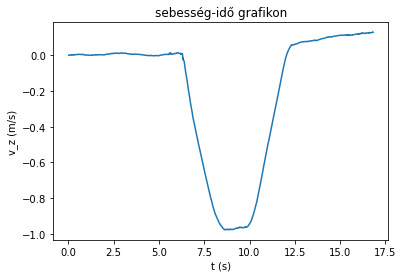

In [83]:
plt.plot(adata.t, adata["v"])
plt.title("sebesség-idő grafikon")
plt.xlabel("t (s)")
plt.ylabel("v_z (m/s)")
plt.show()

**Megjegyzés:** A grafikon nem tökéletes, hiszen a liftnek meg kellene állnia, azaz a mozgás végén is 0 m/s sebesség kellene, ami enyhén emelkedik. 

A hiba fő oka a mérés hibájában keresendő. A telefonok gyorsulás mérője egy hoszzabb idejű mérés során elállítódik. A mérés végén, már nem ugyan az a $g$ értéket méri

#### pillanatnyi hely x(t) kiszámítása és ábrázolása

In [84]:
adata["z"] =  dint(adata["t"], adata["v"])

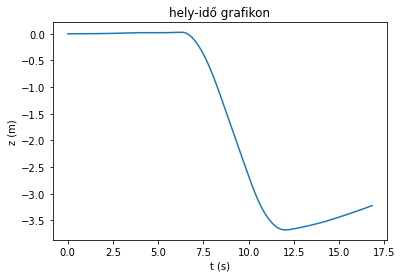

In [85]:
plt.plot(adata.t, adata["z"])
plt.title("hely-idő grafikon")
plt.xlabel("t (s)")
plt.ylabel("z (m)")
plt.show()